In [1]:
import sys
sys.path.append('/home/ksmehrab/AttentionGrounding/DatasetProcessing/PartImageNet')

In [2]:
from partimagenet_dataset import PartImageNetDataset

In [3]:
partimagenet_dataset = PartImageNetDataset(
    json_path='/data/VLMGroundingProject/Datasets/PartImageNet/test.json',
    images_dir='/data/VLMGroundingProject/Datasets/PartImageNet/test'
)

print(f"Number of annotations: {partimagenet_dataset.num_annotations}")
# Get annotation by index
result = partimagenet_dataset.get_annotation(585)

print(f"Class: {result['class_name']}")
print(f"Bboxes (xyxy): {result['bboxes']}")
print(f"Mask: {result['masks']}")
print(f"Combined mask shape: {result['mask'].shape}")

Number of annotations: 14260
Error creating masks: coordinate list must contain at least 2 coordinates
Class: Car's Body
Bboxes (xyxy): [[1, 31, 498, 235], [438, 67, 438, 67]]
Mask: None


AttributeError: 'NoneType' object has no attribute 'shape'

In [14]:
len(partimagenet_dataset.merged_annotations[0]['segmentations'][1][0])

68

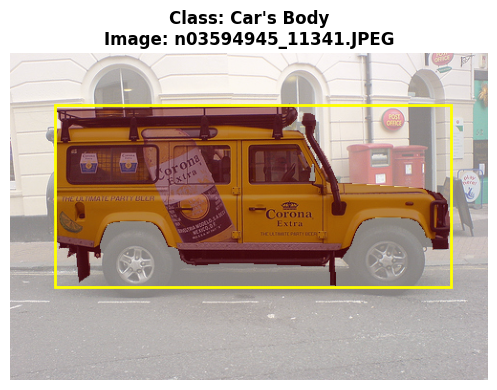

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Display the original image
ax.imshow(result['image'])

# Overlay the mask (in red with transparency)
if result['mask'] is not None:
    ax.imshow(result['mask'], alpha=0.5, cmap='Reds')

# Draw bounding box
if result['bboxes'] is not None:
    boxes = result['bboxes']
    for box in boxes:
        x1, y1, x2, y2 = box
        width = x2 - x1
        height = y2 - y1

        # Create rectangle patch
        rect = patches.Rectangle((x1, y1), width, height, 
                           linewidth=2, edgecolor='yellow', facecolor='none')
        ax.add_patch(rect)

# Set title and remove axes
ax.set_title(f"Class: {result['class_name']}\nImage: {result['image_filename']}", 
             fontsize=12, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()